## Dataset Description

This dataset contains daily ridership data for various public transport services across the country.

### Variable Definitions

| Variable               | Data Type | Description                                                      |
|------------------------|-----------|------------------------------------------------------------------|
| `date`                 | Date      | Date in YYYY-MM-DD format                                        |
| `bus_rkl`              | Integer   | Number of trips for Rapid Bus (KL), not the number of unique individuals  |
| `bus_rkn`              | Integer   | Number of trips for Rapid Bus (Kuantan), not the number of unique individuals |
| `bus_rpn`              | Integer   | Number of trips for Rapid Bus (Penang), not the number of unique individuals |
| `rail_lrt_ampang`      | Integer   | Number of trips for LRT Ampang Line, not the number of unique individuals |
| `rail_lrt_kj`          | Integer   | Number of trips for LRT Kelana Jaya Line, not the number of unique individuals |
| `rail_monorail`        | Integer   | Number of trips for Monorail Line, not the number of unique individuals |
| `rail_mrt_kajang`      | Integer   | Number of trips for MRT Kajang Line, not the number of unique individuals |
| `rail_mrt_pjy`         | Integer   | Number of trips for MRT Putrajaya Line, not the number of unique individuals |
| `rail_ets`             | Integer   | Number of trips for KTMB ETS, not the number of unique individuals |
| `rail_intercity`       | Integer   | Number of trips for KTM Intercity, not the number of unique individuals |
| `rail_komuter`         | Integer   | Number of trips for KTM Komuter, not the number of unique individuals |
| `rail_komuter_utara`   | Integer   | Number of trips for KTM Komuter Utara, not the number of unique individuals |
| `rail_tebrau`          | Integer   | Number of trips for KTM Shuttle Tebrau, not the number of unique individuals |


Import necessary libraries

In [161]:
import numpy as np
import pandas as pd
import math #mathematical functions

import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mode #just for mode
from scipy.special import binom #binomial distribution
from scipy.stats import iqr #only for interquartile range

''' from google.colab import drive
drive.mount('/content/drive') '''

" from google.colab import drive\ndrive.mount('/content/drive') "

In [196]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA = 'https://storage.data.gov.my/transportation/ridership_headline.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

EDA

In [163]:
df.head(10)

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter
0,2019-01-01,<NA>,<NA>,<NA>,113357,114173,139634,35804,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2019-01-02,<NA>,<NA>,<NA>,182715,169316,274224,31859,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,2019-01-03,<NA>,<NA>,<NA>,187904,175304,286469,31893,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,2019-01-04,<NA>,<NA>,<NA>,198420,187891,304755,34121,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,2019-01-05,<NA>,<NA>,<NA>,120773,112660,145036,29950,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,2019-01-06,<NA>,<NA>,<NA>,101145,95913,120032,25342,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,2019-01-07,<NA>,<NA>,<NA>,197569,184365,301290,31988,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,2019-01-08,<NA>,<NA>,<NA>,196879,185920,304680,31792,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
8,2019-01-09,<NA>,<NA>,<NA>,197314,188770,307069,32305,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,2019-01-10,<NA>,<NA>,<NA>,198876,189818,310510,32057,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [164]:
df.tail(10)

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter
1937,2024-04-21,149283,2850,40217,113505,149974,124892,40789,74164,12135,3133,15255,7091,27957
1938,2024-04-22,222967,3065,42619,186110,232509,256725,53584,142827,10294,2029,11004,8111,37345
1939,2024-04-23,226112,2969,43004,191353,243451,272842,55248,148808,7973,1956,9512,8151,35997
1940,2024-04-24,226961,3030,41881,191429,248489,274518,55395,148782,8063,2069,9583,8331,35835
1941,2024-04-25,223902,2653,42171,189166,244874,270387,55801,146571,10528,3309,12594,8434,37541
1942,2024-04-26,221708,2874,44501,193453,251457,262936,56404,146185,12058,3966,16260,9461,43944
1943,2024-04-27,156539,2865,39171,143091,192673,156561,47139,94517,11831,4351,14180,8494,29681
1944,2024-04-28,149248,2960,40715,117225,162298,133240,43748,77668,11928,3428,15293,7062,28676
1945,2024-04-29,222471,2869,44318,187311,237795,260006,55840,143725,10779,1831,11126,8322,38268
1946,2024-04-30,230072,3032,44936,194819,256624,276262,58774,151140,10332,3262,12899,9759,38568


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1947 non-null   datetime64[ns]
 1   bus_rkl             851 non-null    Int64         
 2   bus_rkn             851 non-null    Int64         
 3   bus_rpn             851 non-null    Int64         
 4   rail_lrt_ampang     1947 non-null   Int64         
 5   rail_mrt_kajang     1947 non-null   Int64         
 6   rail_lrt_kj         1947 non-null   Int64         
 7   rail_monorail       1947 non-null   Int64         
 8   rail_mrt_pjy        685 non-null    Int64         
 9   rail_ets            1294 non-null   Int64         
 10  rail_intercity      1294 non-null   Int64         
 11  rail_komuter_utara  1294 non-null   Int64         
 12  rail_tebrau         682 non-null    Int64         
 13  rail_komuter        213 non-null    Int64       

In [166]:
df.describe()

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter
count,1947,851.0,851.0,851.0,1947.0,1947.0,1947.0,1947.0,685.0,1294.0,1294.0,1294.0,682.0,213.0
mean,2021-08-31 00:00:00,158387.6604,2299.982374,36363.141011,120992.279918,130524.228557,164395.766821,30369.077042,70132.449635,7434.750386,2609.346213,7768.884853,8336.199413,35778.014085
min,2019-01-01 00:00:00,71611.0,916.0,20758.0,6587.0,4973.0,7195.0,1392.0,12108.0,50.0,28.0,436.0,4348.0,20236.0
25%,2020-05-01 12:00:00,127794.5,1967.0,33402.5,81562.5,75133.5,94056.0,16982.0,22913.0,2513.75,1063.5,4090.75,7779.75,29725.0
50%,2021-08-31 00:00:00,156092.0,2317.0,37206.0,118598.0,126802.0,144255.0,31443.0,68540.0,8753.5,2296.0,7957.5,8509.0,37480.0
75%,2022-12-30 12:00:00,197399.5,2633.0,40660.5,160852.5,194938.5,237180.0,41702.0,113712.0,11663.75,4072.25,11273.75,9079.75,39079.0
max,2024-04-30 00:00:00,237735.0,4865.0,56449.0,258313.0,265735.0,352328.0,79585.0,151140.0,14584.0,7648.0,20495.0,10036.0,89320.0
std,NaN,41993.887493,492.951439,5795.09862,55440.591594,67311.956292,92145.594278,16130.488387,46136.683075,4662.844422,1862.887924,4360.979131,1068.628409,7925.173684


In [198]:
# feature engineering for date
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day
df.head(10)

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter,year,month,day
0,2019-01-01,<NA>,<NA>,<NA>,113357,114173,139634,35804,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019,1,1
1,2019-01-02,<NA>,<NA>,<NA>,182715,169316,274224,31859,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019,1,2
2,2019-01-03,<NA>,<NA>,<NA>,187904,175304,286469,31893,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019,1,3
3,2019-01-04,<NA>,<NA>,<NA>,198420,187891,304755,34121,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019,1,4
4,2019-01-05,<NA>,<NA>,<NA>,120773,112660,145036,29950,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019,1,5
5,2019-01-06,<NA>,<NA>,<NA>,101145,95913,120032,25342,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019,1,6
6,2019-01-07,<NA>,<NA>,<NA>,197569,184365,301290,31988,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019,1,7
7,2019-01-08,<NA>,<NA>,<NA>,196879,185920,304680,31792,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019,1,8
8,2019-01-09,<NA>,<NA>,<NA>,197314,188770,307069,32305,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019,1,9
9,2019-01-10,<NA>,<NA>,<NA>,198876,189818,310510,32057,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019,1,10


In [199]:
df = df.drop(['date','day'], axis=1)

In [200]:
# Melt the DataFrame to convert the wide format to long format
df = df.melt(id_vars=['year', 'month'], var_name='public_transport', value_name='number_of_trips')

# Define a function to determine the transport type
def determine_transport_type(transport):
    if 'rail' in transport:
        return 'rail'
    elif 'bus' in transport:
        return 'bus'
    else:
        return 'other'

# Create the 'transport_type' column based on the 'public_transport' column
df['transport_type'] = df['public_transport'].apply(determine_transport_type)

# Group the melted DataFrame by 'year', 'month', 'public_transport', and 'transport_type', sum the 'number_of_trips'
df = df.groupby(['year', 'month', 'public_transport', 'transport_type'])['number_of_trips'].sum().reset_index()


In [170]:
df

,year,month,public_transport,transport_type,number_of_trips
0,2019,1,bus_rkl,bus,0
1,2019,1,bus_rkn,bus,0
2,2019,1,bus_rpn,bus,0
3,2019,1,rail_ets,rail,0
4,2019,1,rail_intercity,rail,0
...,...,...,...,...,...
827,2024,4,rail_lrt_kj,rail,6445256
828,2024,4,rail_monorail,rail,1557086
829,2024,4,rail_mrt_kajang,rail,6262373
830,2024,4,rail_mrt_pjy,rail,3575514


In [171]:
# Assuming 'grouped_df' is your DataFrame containing the grouped data by 'year', 'month', and 'public_transport'

# Specify the type of public transport you're interested in
public_transport_type = 'rail_lrt_ampang'
# Specify the year and month
year = 2019
month = 1

# Filter the DataFrame for the specified year, month, and type of public transport
filtered_df = df[(df['year'] == year) & (df['month'] == month) & (df['public_transport'] == public_transport_type)]

# Calculate the sum of the number of trips for the specific type of public transport in January 2019
total_trips = filtered_df['number_of_trips'].sum()

print(f"Total number of trips for {public_transport_type} in January {year}: {total_trips}")


Total number of trips for rail_lrt_ampang in January 2019: 5363000


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              832 non-null    int32 
 1   month             832 non-null    int32 
 2   public_transport  832 non-null    object
 3   transport_type    832 non-null    object
 4   number_of_trips   832 non-null    Int64 
dtypes: Int64(1), int32(2), object(2)
memory usage: 26.9+ KB


In [202]:
df.public_transport = df.public_transport.astype('category')

In [203]:
df.transport_type = df.transport_type.astype('category')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   year              832 non-null    int32   
 1   month             832 non-null    int32   
 2   public_transport  832 non-null    category
 3   transport_type    832 non-null    category
 4   number_of_trips   832 non-null    Int64   
dtypes: Int64(1), category(2), int32(2)
memory usage: 16.3 KB


In [176]:
df.isnull().sum()

year                0
month               0
public_transport    0
transport_type      0
number_of_trips     0
dtype: int64

array([[<Axes: title={'center': 'month'}, xlabel='[transport_type]'>,
        <Axes: title={'center': 'number_of_trips'}, xlabel='[transport_type]'>],
       [<Axes: title={'center': 'year'}, xlabel='[transport_type]'>,
        <Axes: >]], dtype=object)

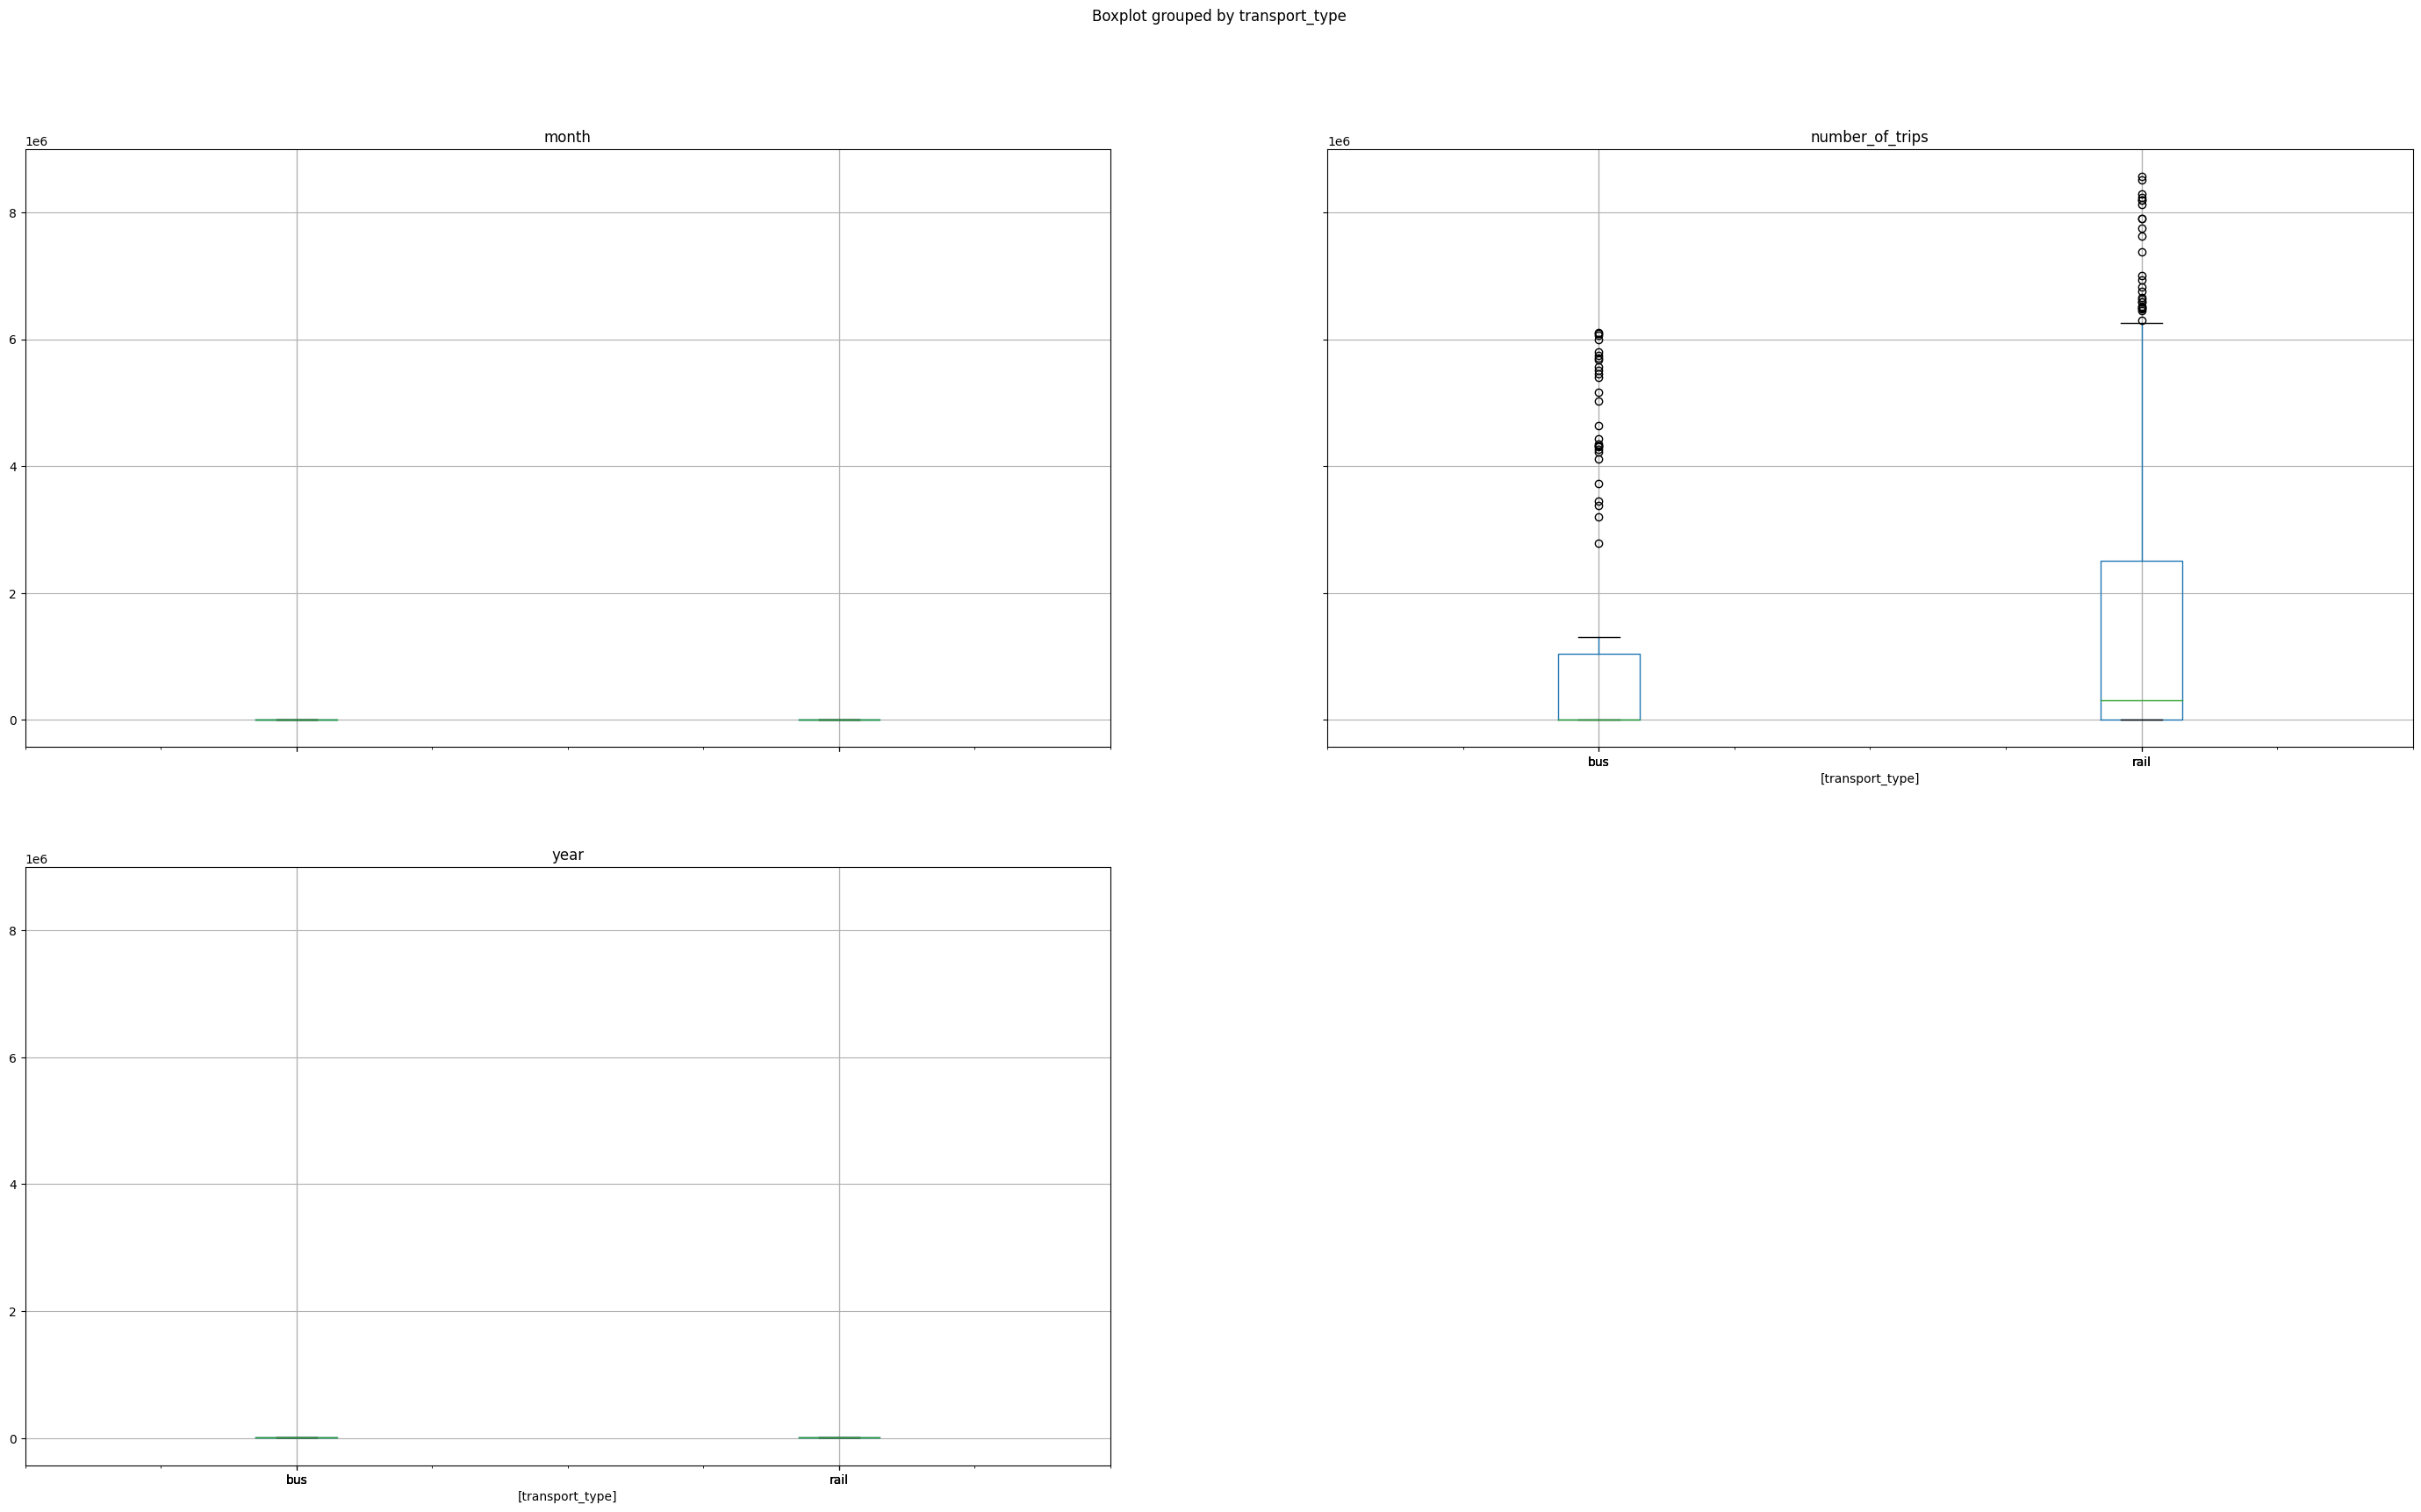

In [177]:
df.boxplot(by='transport_type', figsize=(34, 20))

In [178]:
df.select_dtypes(include='number').median()

year                 2021.0
month                   6.0
number_of_trips    169367.0
dtype: float64

In [179]:
df.select_dtypes(include='number').mean()

year               2.021188e+03
month              6.250000e+00
number_of_trips    1.347352e+06
dtype: float64

In [180]:
df.select_dtypes(include='number').var()

year               2.405235e+00
month              1.220217e+01
number_of_trips    4.297710e+12
dtype: float64

In [ ]:
print(f"""
The minimum is {min(df.number_of_trips)}
The maximum is {max(df.number_of_trips)}
The first quartile is {np.quantile(df.number_of_trips,.25)}
The median is {np.median(df.number_of_trips)}
The third quartile is {np.quantile(df.number_of_trips,.75)}
The range is {max(df.number_of_trips) - min(df.number_of_trips)}
The IQR is {iqr(df.number_of_trips)}
The lower fence is {np.quantile(df.number_of_trips,.25) - 1.5 * iqr(df.number_of_trips)}
The upper fence is {np.quantile(df.number_of_trips,.75) + 1.5 * iqr(df.number_of_trips)}
""")

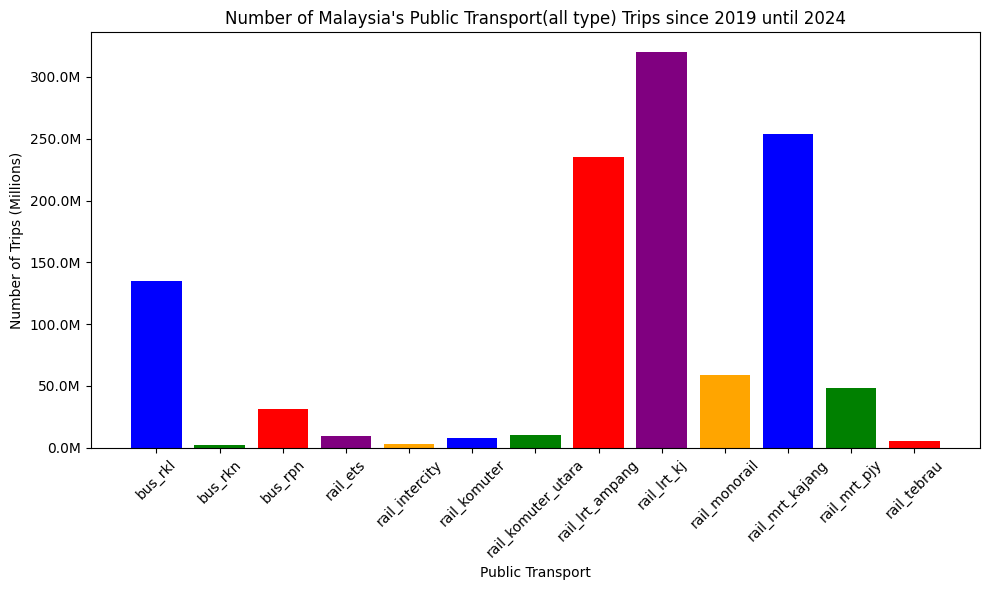

In [182]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Specify the size of the plot
plt.figure(figsize=(10, 6))

# Formatter function to convert y-axis values to millions
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Set the formatter
formatter = FuncFormatter(millions)

# Group the DataFrame by 'public_transport' and sum the 'number_of_trips'
grouped_df = df.groupby('public_transport')['number_of_trips'].sum().reset_index()

# Define colors for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plotting with colors
plt.bar(x=grouped_df["public_transport"], height=grouped_df["number_of_trips"], color=colors)
plt.title("Number of Malaysia's Public Transport(all type) Trips since 2019 until 2024")
plt.xlabel('Public Transport')
plt.ylabel('Number of Trips (Millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().yaxis.set_major_formatter(formatter)  # Set the formatter for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


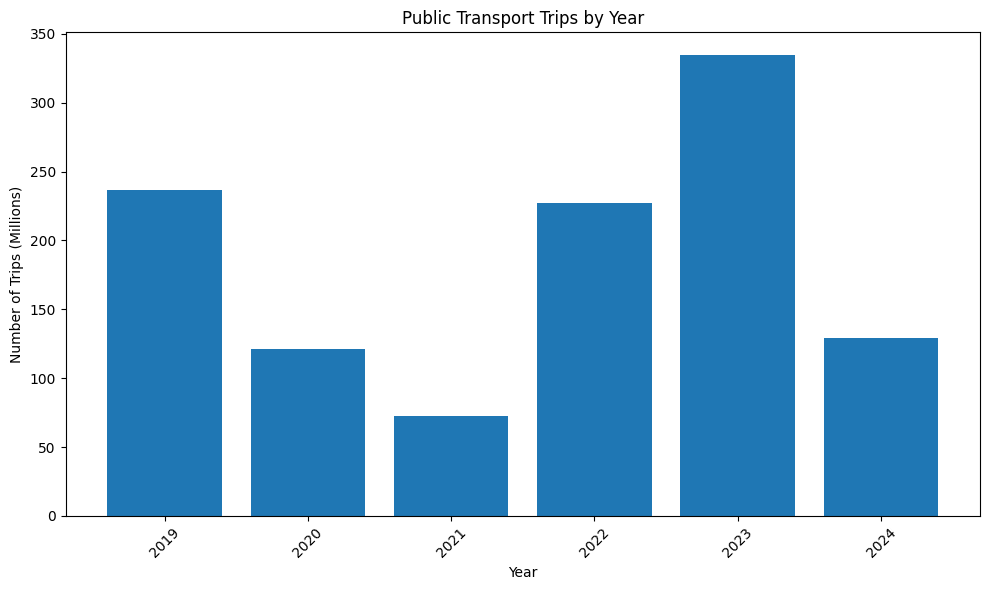

In [183]:
# Group the DataFrame by year and sum the number of trips for each year
trips_by_year = df.groupby('year')['number_of_trips'].sum()

# Specify the size of the plot
plt.figure(figsize=(10, 6))

# Plotting
plt.bar(x=trips_by_year.index, height=trips_by_year.values / 1000000)
plt.title("Public Transport Trips by Year")
plt.xlabel('Year')
plt.ylabel('Number of Trips (Millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

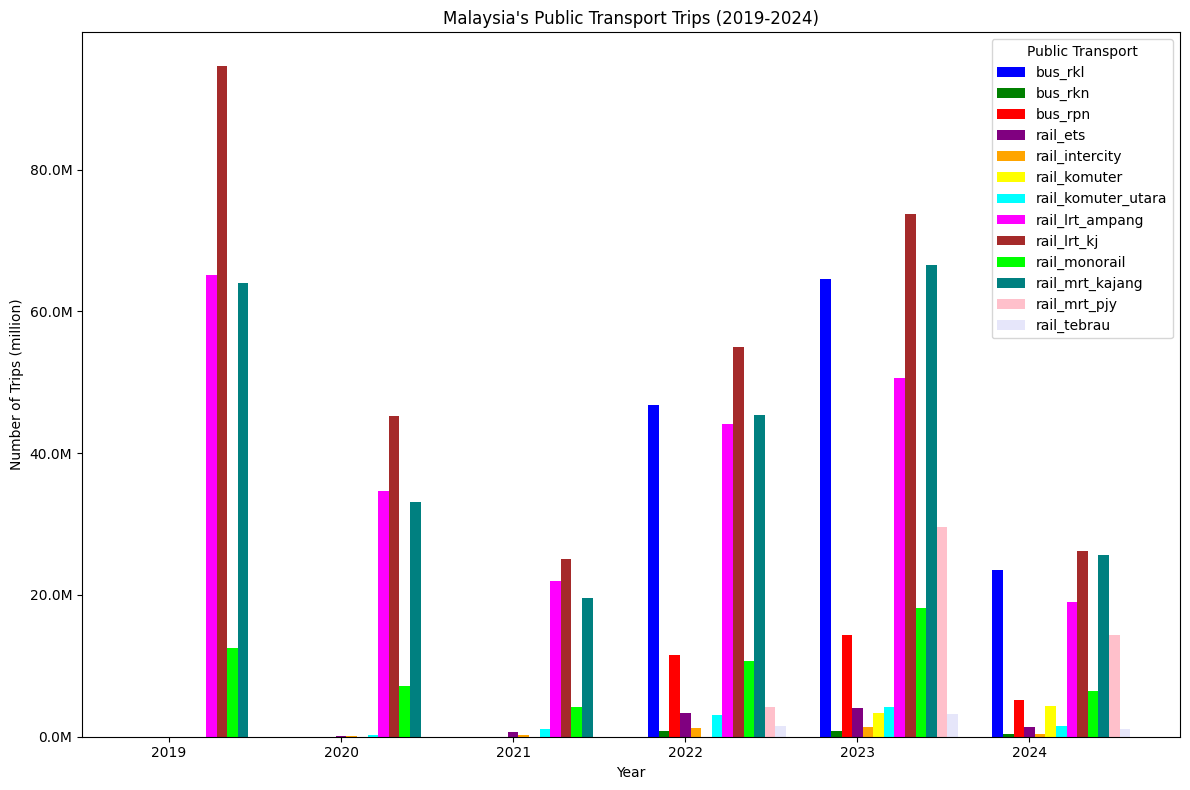

In [207]:
# Group the DataFrame by year and public transport type, and sum the number of trips for each group
trips_by_year_transport = df.groupby(['year', 'public_transport'])['number_of_trips'].sum().unstack()

# Specify the size of the plot
plt.figure(figsize=(12, 8))

# Plotting
num_years = len(trips_by_year_transport.index)
bar_width = 0.8 / len(trips_by_year_transport.columns)  # Width of each bar
# Custom colors for the bars (extend the list as needed)
custom_colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'lime', 'teal', 'pink', 'lavender']

for i, col in enumerate(trips_by_year_transport.columns):
    plt.bar(
        trips_by_year_transport.index + i * bar_width,
        trips_by_year_transport[col],
        width=bar_width,
        label=col,
        color=custom_colors[i % len(custom_colors)]  # Use custom color from the palette
    )

# Formatter function to convert y-axis values to millions
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Set the formatter for the y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(millions))

plt.title("Malaysia's Public Transport Trips (2019-2024)")
plt.xlabel('Year')
plt.ylabel('Number of Trips (million)')
plt.xticks(trips_by_year_transport.index + bar_width * (num_years // 2), trips_by_year_transport.index)
plt.legend(title='Public Transport', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

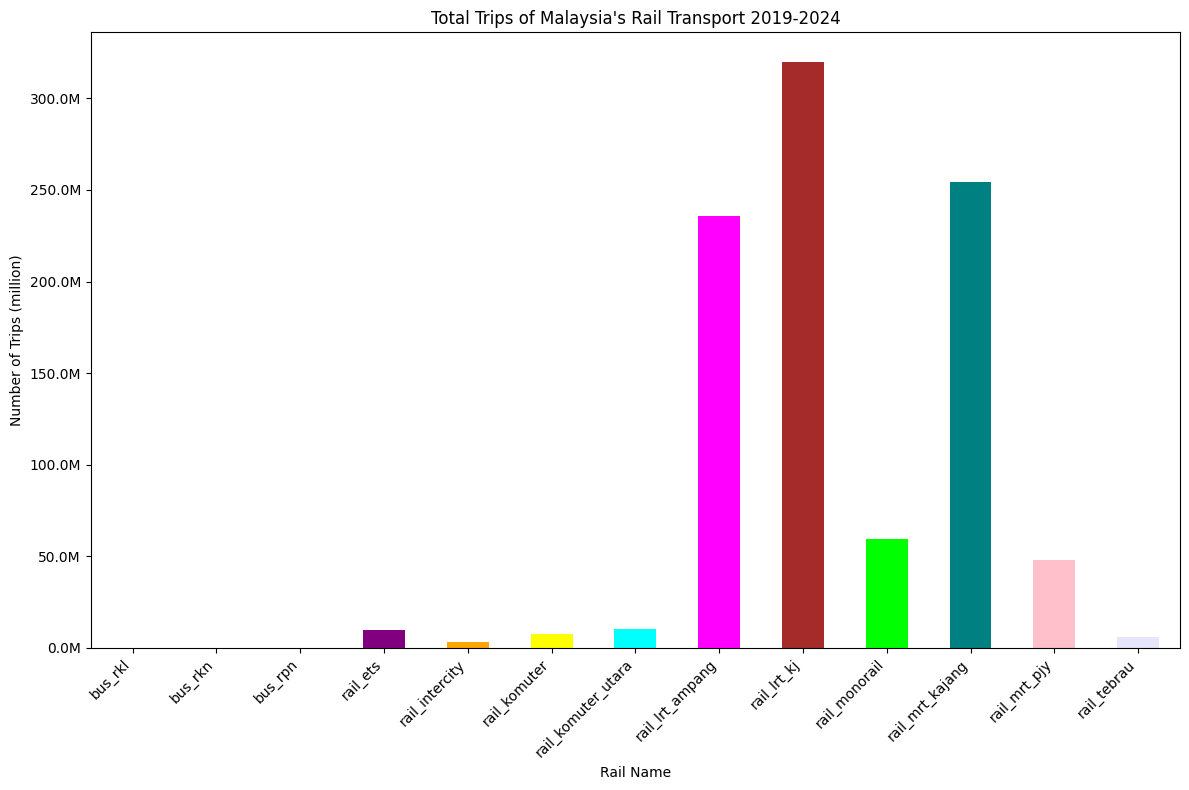

In [208]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filtering for rail transport
rail_transport = df[df['transport_type'] == 'rail']


# Group the DataFrame by rail name and sum the number of trips
trips_by_rail_name = rail_transport.groupby(['public_transport'])['number_of_trips'].sum()
# Specify the size of the plot
plt.figure(figsize=(12, 8))


# Plotting
trips_by_rail_name.plot(kind='bar', color=custom_colors[:len(trips_by_rail_name)])

# Formatter function to convert y-axis values to millions
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Set the formatter
formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Total Trips of Malaysia's Rail Transport 2019-2024")
plt.xlabel('Rail Name')
plt.ylabel('Number of Trips (million)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

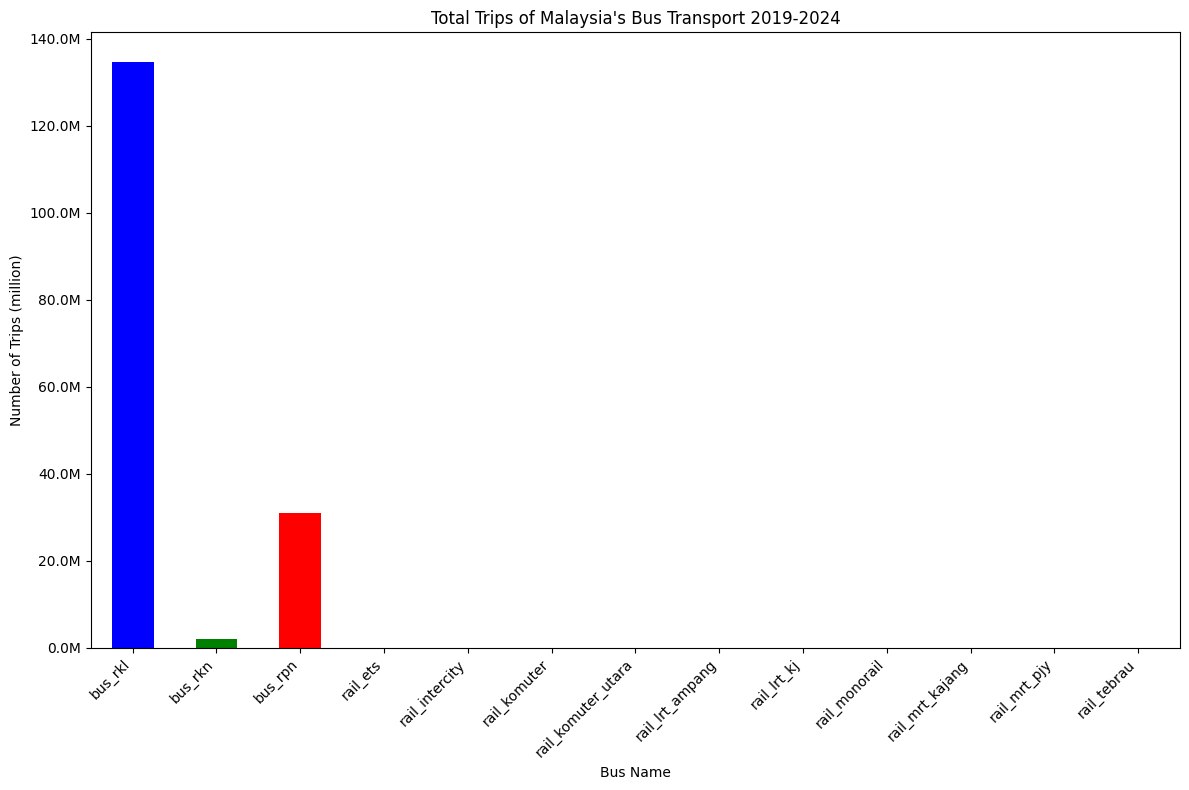

In [209]:
from matplotlib.ticker import FuncFormatter

# Filtering for rail transport
bus_transport = df[df['transport_type'] == 'bus']

# Group the DataFrame by rail name and sum the number of trips
trips_by_bus_name = bus_transport.groupby(['public_transport'])['number_of_trips'].sum()
# Specify the size of the plot
plt.figure(figsize=(12, 8))


# Plotting
trips_by_bus_name.plot(kind='bar', color=custom_colors[:len(trips_by_bus_name)])

# Formatter function to convert y-axis values to millions
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Set the formatter
formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Total Trips of Malaysia's Bus Transport 2019-2024")
plt.xlabel('Bus Name')
plt.ylabel('Number of Trips (million)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [206]:
# Group the DataFrame by 'public_transport' and sum the number of trips for each mode
trips_by_transport = df.groupby('public_transport')['number_of_trips'].sum()

# Find the mode with the highest number of trips
mode_with_highest_trips = trips_by_transport.idxmax()

# Get the number of trips for the mode with the highest number of trips
highest_trips = trips_by_transport.max()

print("Public transport with the highest trips(2019-2024):", mode_with_highest_trips)
print("Number of trips:", highest_trips)

Public transport with the highest trips(2019-2024): rail_lrt_kj
Number of trips: 320078558


In [188]:
# Specify the year you're interested in
year = 2020

# Filter the DataFrame for the specified year
df_year = df[df['year'] == year]

# Group the filtered DataFrame by 'public_transport' and sum the number of trips for each mode
trips_by_transport = df_year.groupby('public_transport')['number_of_trips'].sum()

# Find the mode with the highest number of trips
mode_with_highest_trips = trips_by_transport.idxmax()

# Get the number of trips for the mode with the highest number of trips
highest_trips = trips_by_transport.max()

print("Public transport with the highest trips in", year, ":", mode_with_highest_trips)
print("Number of trips:", highest_trips)


Public transport with the highest trips in 2020 : rail_lrt_kj
Number of trips: 45307182


In [190]:
# Group the DataFrame by 'public_transport' and sum the number of trips for each mode
trips_by_transport = df.groupby('public_transport')['number_of_trips'].sum()

# Find the mode with the highest number of trips
mode_with_highest_trips = trips_by_transport.idxmax()

# Get the number of trips for the mode with the highest number of trips
highest_trips = trips_by_transport.max()

print("Public transport with the highest trips for 2019-2024:", mode_with_highest_trips)
print(f"Number of trips for {mode_with_highest_trips}:", highest_trips)
print("\n")

# Specify the type of public transport you're interested in
public_transport_type = 'rail_mrt_pjy'
# Specify the year
year = 2023

# Filter the DataFrame for the specified year and type of public transport
filtered_df = df[(df['year'] == year) & (df['public_transport'] == public_transport_type)]

# Calculate the sum of the number of trips for the specific type of public transport in the specified year
total_trips = filtered_df['number_of_trips'].sum()

print(f"Total number of trips for {public_transport_type} in {year}: {total_trips}")

Public transport with the highest trips for 2019-2024: rail_lrt_kj
Number of trips for rail_lrt_kj: 320078558


Total number of trips for rail_mrt_pjy in 2023: 29555851


In [191]:
df_transport_tab = pd.crosstab(df.loc[:, "public_transport"],
                             df.loc[:, "transport_type"])

df_transport_tab

transport_type,bus,rail
public_transport,,
bus_rkl,64,0
bus_rkn,64,0
bus_rpn,64,0
rail_ets,0,64
rail_intercity,0,64
rail_komuter,0,64
rail_komuter_utara,0,64
rail_lrt_ampang,0,64
rail_lrt_kj,0,64


**Modelling Part**

In [229]:
import pandas as pd

URL_DATA = 'https://storage.data.gov.my/transportation/ridership_headline.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

# feature engineering for date
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day

# fill na with 0 considering some public transports not officially operated yet
df = df.fillna(0)
df.head(10)

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter,year,month,day
0,2019-01-01,0,0,0,113357,114173,139634,35804,0,0,0,0,0,0,2019,1,1
1,2019-01-02,0,0,0,182715,169316,274224,31859,0,0,0,0,0,0,2019,1,2
2,2019-01-03,0,0,0,187904,175304,286469,31893,0,0,0,0,0,0,2019,1,3
3,2019-01-04,0,0,0,198420,187891,304755,34121,0,0,0,0,0,0,2019,1,4
4,2019-01-05,0,0,0,120773,112660,145036,29950,0,0,0,0,0,0,2019,1,5
5,2019-01-06,0,0,0,101145,95913,120032,25342,0,0,0,0,0,0,2019,1,6
6,2019-01-07,0,0,0,197569,184365,301290,31988,0,0,0,0,0,0,2019,1,7
7,2019-01-08,0,0,0,196879,185920,304680,31792,0,0,0,0,0,0,2019,1,8
8,2019-01-09,0,0,0,197314,188770,307069,32305,0,0,0,0,0,0,2019,1,9
9,2019-01-10,0,0,0,198876,189818,310510,32057,0,0,0,0,0,0,2019,1,10


In [218]:
year = df["year"]

q1 = np.percentile(year , 25)
q3 = np.percentile(year , 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print("Lower Fence: ",lwr_bound)
print("Upper Fence: ",upr_bound)

Lower Fence:  2017.0
Upper Fence:  2025.0


In [219]:
month = df["month"]

q1 = np.percentile(month , 25)
q3 = np.percentile(month , 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print("Lower Fence: ",lwr_bound)
print("Upper Fence: ",upr_bound)

Lower Fence:  -6.0
Upper Fence:  18.0


In [221]:
lrt_kj = df["rail_lrt_kj"]

q1 = np.percentile(lrt_kj , 25)
q3 = np.percentile(lrt_kj , 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print("Lower Fence: ",lwr_bound)
print("Upper Fence: ",upr_bound)

Lower Fence:  -120630.0
Upper Fence:  451866.0


In [222]:
lrt_ampang = df["rail_lrt_ampang"]

q1 = np.percentile(lrt_ampang , 25)
q3 = np.percentile(lrt_ampang , 75)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print("Lower Fence: ",lwr_bound)
print("Upper Fence: ",upr_bound)

Lower Fence:  -37372.5
Upper Fence:  279787.5


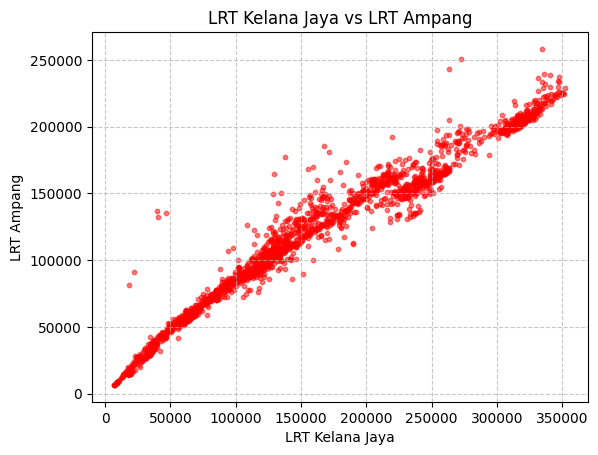

In [227]:
plt.scatter(df['rail_lrt_kj'], df['rail_lrt_ampang'], alpha=0.5, c='red', s=10)
plt.title('LRT Kelana Jaya vs LRT Ampang')
plt.xlabel('LRT Kelana Jaya')
plt.ylabel('LRT Ampang')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

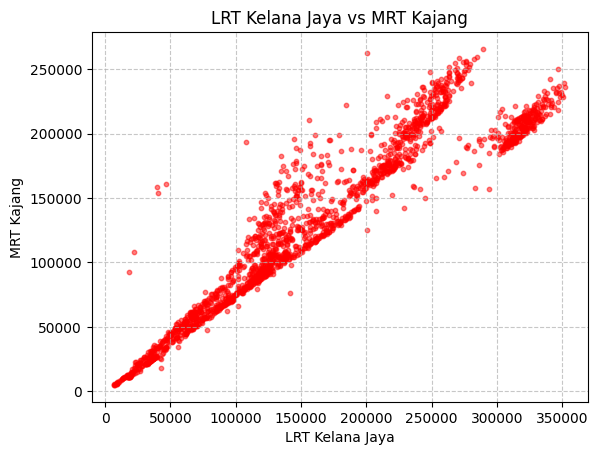

In [263]:
plt.scatter(df['rail_lrt_kj'], df['rail_mrt_kajang'], alpha=0.5, c='red', s=10)
plt.title('LRT Kelana Jaya vs MRT Kajang')
plt.xlabel('LRT Kelana Jaya')
plt.ylabel('MRT Kajang')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

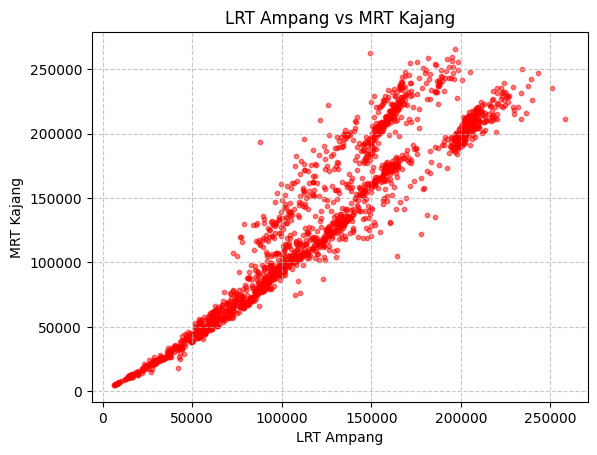

In [264]:
plt.scatter(df['rail_lrt_ampang'], df['rail_mrt_kajang'], alpha=0.5, c='red', s=10)
plt.title('LRT Ampang vs MRT Kajang')
plt.xlabel('LRT Ampang')
plt.ylabel('MRT Kajang')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

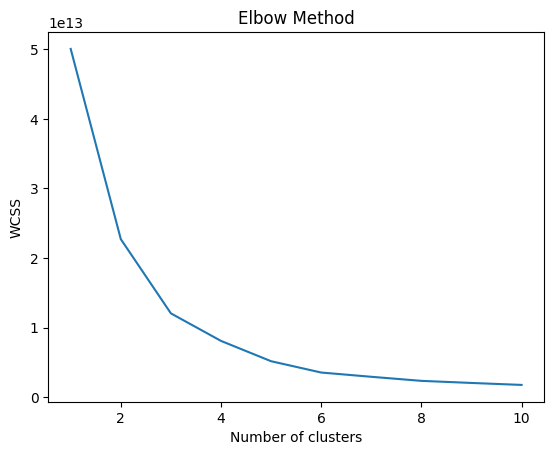

In [230]:
from sklearn.cluster import KMeans

df = df.drop(columns=['date','year','month','day'])

wcss = []    #within cluster sum of squares # give us the optimal number of clusters

# init = initialisation of centroids
# max_iter = max number of iterations for each K_Means run
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# when the line starts to show consistent to zero, that is the optimal number of clusters



In [260]:
# Fit K-Means to the data with K=5
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
# fit_predict = predict number of clusters for each observations in dataset
clusters = kmeans.fit_predict(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Create separate dataframes for each cluster
cluster_dataframes = [df[df['Cluster'] == i] for i in range(5)]


In [233]:
df.head()

,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter,Cluster
1942,221708,2874,44501,193453,251457,262936,56404,146185,12058,3966,16260,9461,43944,1
1943,156539,2865,39171,143091,192673,156561,47139,94517,11831,4351,14180,8494,29681,5
1944,149248,2960,40715,117225,162298,133240,43748,77668,11928,3428,15293,7062,28676,5
1945,222471,2869,44318,187311,237795,260006,55840,143725,10779,1831,11126,8322,38268,1
1946,230072,3032,44936,194819,256624,276262,58774,151140,10332,3262,12899,9759,38568,1


In [234]:
df.tail()

,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter,Cluster
1942,221708,2874,44501,193453,251457,262936,56404,146185,12058,3966,16260,9461,43944,1
1943,156539,2865,39171,143091,192673,156561,47139,94517,11831,4351,14180,8494,29681,5
1944,149248,2960,40715,117225,162298,133240,43748,77668,11928,3428,15293,7062,28676,5
1945,222471,2869,44318,187311,237795,260006,55840,143725,10779,1831,11126,8322,38268,1
1946,230072,3032,44936,194819,256624,276262,58774,151140,10332,3262,12899,9759,38568,1


In [261]:
# model evaluation is compulsory
from sklearn.metrics import silhouette_score

# Separating features and cluster labels
# features is set with columns that record high observation diff of number of trips
features = df[['rail_lrt_kj', 'rail_lrt_ampang','rail_mrt_kajang','bus_rkl']]
# cluster number is the target
cluster_labels = df['Cluster']

# Computing the silhouette score
# if closer to 1, well separated clusters
silhouette = silhouette_score(features, cluster_labels)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.5697245787269777


In [265]:
df.to_csv("malaysia_public_transport_cluster.csv")

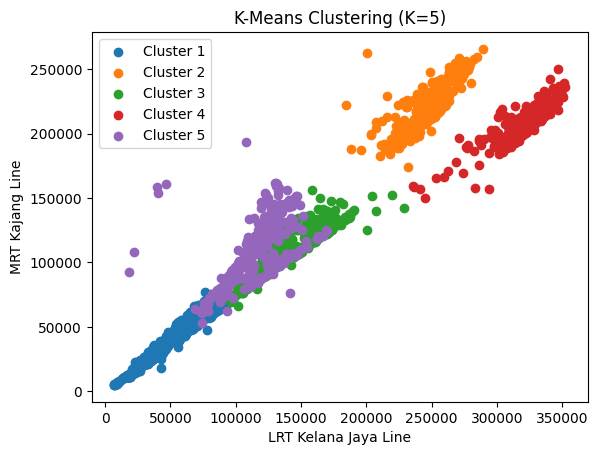

In [266]:
# Plot each cluster separately
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['rail_lrt_kj'], cluster_df['rail_mrt_kajang'], label=f'Cluster {i + 1}')

plt.xlabel('LRT Kelana Jaya Line')
plt.ylabel('MRT Kajang Line')
plt.title('K-Means Clustering (K=5)')
plt.legend()
plt.show()

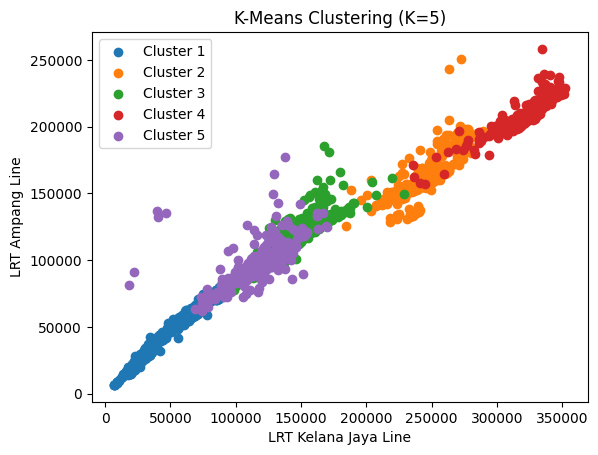

In [272]:
# Plot each cluster separately
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['rail_lrt_kj'], cluster_df['rail_lrt_ampang'], label=f'Cluster {i + 1}')

plt.xlabel('LRT Kelana Jaya Line')
plt.ylabel('LRT Ampang Line')
plt.title('K-Means Clustering (K=5)')
plt.legend()
plt.show()

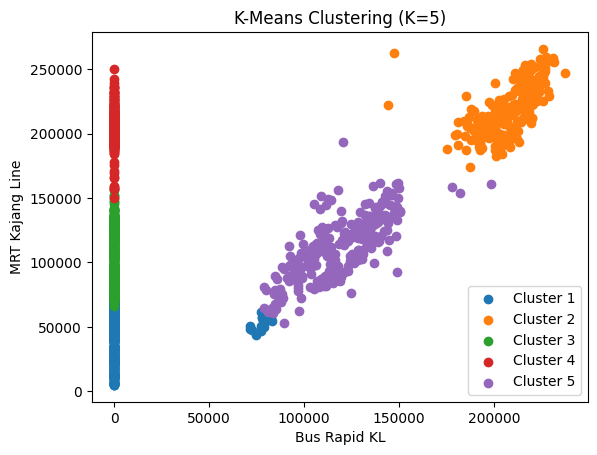

In [267]:
# Plot each cluster separately
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['bus_rkl'], cluster_df['rail_mrt_kajang'], label=f'Cluster {i + 1}')

plt.xlabel('Bus Rapid KL')
plt.ylabel('MRT Kajang Line')
plt.title('K-Means Clustering (K=5)')
plt.legend()
plt.show()

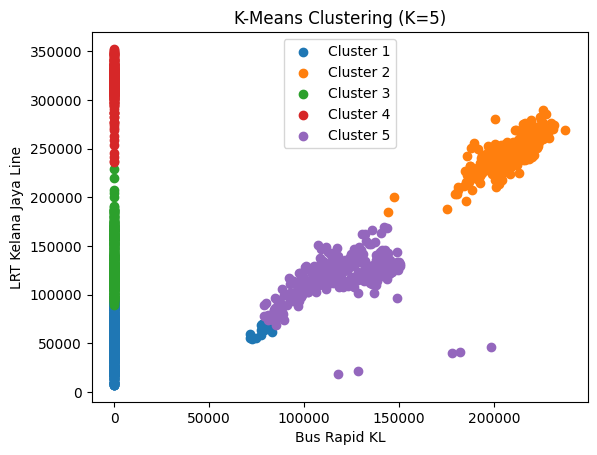

In [268]:
# Plot each cluster separately
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['bus_rkl'], cluster_df['rail_lrt_kj'], label=f'Cluster {i + 1}')

plt.xlabel('Bus Rapid KL')
plt.ylabel('LRT Kelana Jaya Line')
plt.title('K-Means Clustering (K=5)')
plt.legend()
plt.show()

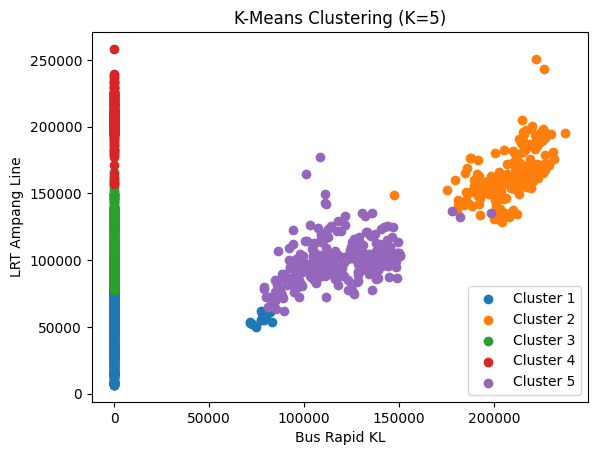

In [270]:
# Plot each cluster separately
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['bus_rkl'], cluster_df['rail_lrt_ampang'], label=f'Cluster {i + 1}')

plt.xlabel('Bus Rapid KL')
plt.ylabel('LRT Ampang Line')
plt.title('K-Means Clustering (K=5)')
plt.legend()
plt.show()

**Archive py**

K-Nearest Neighbors (KNN) imputation is a method used to fill missing values in a dataset by looking at the 'k' nearest observations. This method works by finding the k closest data points (neighbors) to the point with the missing value, based on a specified distance metric (usually Euclidean distance), and then imputing the missing value based on these neighbors.

In [192]:
''' from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

cols_to_exclude = ['year','month']
cols_to_impute = df.columns.difference(cols_to_exclude)

# Create the KNN imputer with n_neighbors=2 (you can adjust this)
imputer = KNNImputer()

param_grid = {
    'n_neighbors': [1,2,3,4,5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(imputer, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(df[cols_to_impute])

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_) '''

' from sklearn.impute import KNNImputer\nfrom sklearn.model_selection import GridSearchCV\n\ncols_to_exclude = [\'year\',\'month\']\ncols_to_impute = df.columns.difference(cols_to_exclude)\n\n# Create the KNN imputer with n_neighbors=2 (you can adjust this)\nimputer = KNNImputer()\n\nparam_grid = {\n    \'n_neighbors\': [1,2,3,4,5]\n}\n\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(imputer, param_grid, cv=5, scoring=\'neg_mean_squared_error\')\n\n# Perform grid search\ngrid_search.fit(df[cols_to_impute])\n\n# Print results\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Score:", grid_search.best_score_) '

In [193]:
''' cols_to_exclude = ['year','month']
cols_to_impute = df.columns.difference(cols_to_exclude)

imputer = KNNImputer(n_neighbors=1)
# Fit and transform the data
df_naImputed = pd.DataFrame(imputer.fit_transform(df[cols_to_impute]), columns=cols_to_impute) '''


" cols_to_exclude = ['year','month']\ncols_to_impute = df.columns.difference(cols_to_exclude)\n\nimputer = KNNImputer(n_neighbors=1)\n# Fit and transform the data\ndf_naImputed = pd.DataFrame(imputer.fit_transform(df[cols_to_impute]), columns=cols_to_impute) "

In [194]:
''' print("\nDataFrame after KNN Imputation:")
df_naImputed '''

' print("\nDataFrame after KNN Imputation:")\ndf_naImputed '

In [195]:
''' # Concatenate the imputed data with the 'year' and 'month' columns from the original DataFrame
df_final = pd.concat([df[['year', 'month']], df_naImputed], axis=1) '''

" # Concatenate the imputed data with the 'year' and 'month' columns from the original DataFrame\ndf_final = pd.concat([df[['year', 'month']], df_naImputed], axis=1) "